# Linear Regression in statsmodels (practice)

- [x] Perform initial preprocessing of data
- [x] Perform preprocessing for statsmodels
- [x] Run the model in statsmodels and produce a results summary
- [x] Evaluate the model on the test set

Dataset Link:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction 

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

## Initial Preprocessing

In [347]:
df = pd.read_csv('Data/CarPrice_Assignment.csv', index_col = 'car_ID')
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [349]:
## checking for null values
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [350]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,...,four,103,idi,2.99,3.47,21.9,55,4800,45,50
174,-1,toyota corolla,gas,std,four,sedan,fwd,front,102.4,175.6,...,four,122,mpfi,3.31,3.54,8.7,92,4200,29,34
94,1,nissan titan,gas,std,four,wagon,fwd,front,94.5,170.2,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37
6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
168,2,toyota corona liftback,gas,std,two,hardtop,rwd,front,98.4,176.2,...,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30


In [351]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [352]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [353]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean')#,
                          #StandardScaler()
                          )
preprocessor = make_column_transformer((cat_pipe,cat_cols),
                                        (num_pipe, num_cols), remainder='passthrough')

I am not scaling the data because it will make the coefficients harder to interpret.

## Preprocessing for statsmodels

In [354]:
## fit the col transformer
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['symboling', 'wheelbase', 'carlength',
                                  'carwidth', 'carheight', 'curbweight',
                                  'enginesize', 'boreratio', 'stroke',
                                  'compressionratio', 'horsepower', 'peakrpm',
                                  'citympg', 'highwaympg'])])

**Getting feature names**

In [355]:
ohe_step = preprocessor.named_transformers_['pipeline-1'].named_steps['onehotencoder']
cat_features = ohe_step.get_feature_names_out(cat_cols)
cat_features

array(['CarName_Nissan versa', 'CarName_alfa-romero Quadrifoglio',
       'CarName_alfa-romero giulia', 'CarName_alfa-romero stelvio',
       'CarName_audi 100 ls', 'CarName_audi 100ls', 'CarName_audi 4000',
       'CarName_audi 5000', 'CarName_audi fox', 'CarName_bmw 320i',
       'CarName_bmw x1', 'CarName_bmw x3', 'CarName_bmw z4',
       'CarName_buick opel isuzu deluxe',
       'CarName_buick regal sport coupe (turbo)', 'CarName_buick skyhawk',
       'CarName_buick skylark', 'CarName_chevrolet vega 2300',
       'CarName_dodge challenger se', 'CarName_dodge colt (sw)',
       'CarName_dodge coronet custom', 'CarName_dodge d200',
       'CarName_dodge dart custom', 'CarName_dodge rampage',
       'CarName_honda accord', 'CarName_honda accord cvcc',
       'CarName_honda accord lx', 'CarName_honda civic',
       'CarName_honda civic (auto)', 'CarName_honda civic 1500 gl',
       'CarName_honda civic cvcc', 'CarName_honda prelude',
       'CarName_isuzu D-Max ', 'CarName_isuzu MU-X'

In [356]:
final_features = []
final_features.extend(cat_features)
final_features.extend(num_cols)

**Transform X_train**

In [357]:
X_train_df = pd.DataFrame( preprocessor.transform(X_train), columns=final_features, index=X_train.index)
X_train_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.5,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.9,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,2540.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0


In [358]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), columns=final_features, index=X_test.index)
X_test_df.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.7,3230.0,209.0,3.62,3.39,8.00,182.0,5400.0,16.0,22.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,3053.0,131.0,3.13,3.40,7.00,160.0,5500.0,16.0,22.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54.7,2302.0,120.0,3.33,3.47,8.50,97.0,5200.0,27.0,34.0
133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.1,2658.0,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,58.7,3750.0,183.0,3.58,3.64,21.50,123.0,4350.0,22.0,25.0


**Adding a constant**

In [359]:
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False, has_constant='add')
display(X_train_df.head(2), X_test_df.head(2))

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
car_ID,,,,,,,,,,,,,,,,,,,,,
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017.0,103.0,2.99,3.47,21.9,55.0,4800.0,45.0,50.0,1.0
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2326.0,122.0,3.31,3.54,8.7,92.0,4200.0,29.0,34.0,1.0


,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi fox,CarName_bmw 320i,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,const
car_ID,,,,,,,,,,,,,,,,,,,,,
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3230.0,209.0,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,1.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3053.0,131.0,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,1.0


## Run the model in statsmodels and produce a results summary

In [360]:
model = sm.OLS(y_train, X_train_df)
result = model.fit()

In [361]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sun, 15 May 2022   Prob (F-statistic):            0.00126
Time:                        10:42:34   Log-Likelihood:                -1139.8
No. Observations:                 153   AIC:                             2574.
Df Residuals:                       6   BIC:                             3019.
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
CarName_Nissan versa                     2780.2761   6247.193      0.445      0.672   -1.25e+04    1.81e+04
CarName_alfa-romero Quadrifoglio         4171.6131   7214.829      0.578      0.584   -1.35e+04    2.18e+04
CarName_alfa-romero giulia              -3648.5225   5867.049     -0.622      0.557    -1.8e+04    1.07e+04
CarName_alfa-romero stelvio              -643.5225   5867.049     -0.110      0.916    -1.5e+04    1.37e+04
CarName_audi 100 ls                      1471.6822   3945.640      0.373      0.722   -8182.951    1.11e+04
CarName_audi 100ls                      -3582.7541   3870.321     -0.926      0.390   -1.31e+04    5887.579
CarName_audi 4000                       -1638.0785   7095.196     -0.231      0.825    -1.9e+04    1.57e+04
CarName_audi 5000                       -2515.4776   4483.782     -0.561      0.595   -1.35e+04    8455.941
CarName_audi fox                         4121.4112   1.28e+04      0.323      0.758   -2.71e+04    3.53e+04
CarName_bmw 320i                         7346.1212   5778.146      1.271      0.251   -6792.492    2.15e+04
CarName_bmw x1                           1.918e+04   1.02e+04      1.876      0.110   -5838.900    4.42e+04
CarName_bmw x3                           1.678e+04   7202.949      2.330      0.059    -843.548    3.44e+04
CarName_bmw z4                           1.343e+04   8622.622      1.558      0.170   -7664.254    3.45e+04
CarName_buick opel isuzu deluxe         -3469.5950   7752.164     -0.448      0.670   -2.24e+04    1.55e+04
CarName_buick regal sport coupe (turbo)  8790.8218   1.09e+04      0.809      0.450   -1.78e+04    3.54e+04
CarName_buick skyhawk                    1043.3913   1.38e+04      0.076      0.942   -3.27e+04    3.48e+04
CarName_buick skylark                   -6176.6426   7246.869     -0.852      0.427   -2.39e+04    1.16e+04
CarName_chevrolet vega 2300             -1073.6451   5327.712     -0.202      0.847   -1.41e+04     1.2e+04
CarName_dodge challenger se              1003.2570   6270.995      0.160      0.878   -1.43e+04    1.63e+04
CarName_dodge colt (sw)                 -3900.1592   6791.047     -0.574      0.587   -2.05e+04    1.27e+04
CarName_dodge coronet custom            -3554.1192   8782.584     -0.405      0.700    -2.5e+04    1.79e+04
CarName_dodge d200                      -1178.2201   9141.552     -0.129      0.902   -2.35e+04    2.12e+04
CarName_dodge dart custom                -553.4716   4904.682     -0.113      0.914   -1.26e+04    1.14e+04
CarName_dodge rampage                     -78.5718   7059.838     -0.011      0.991   -1.74e+04    1.72e+04
CarName_honda accord                     2945.9623   1.42e+04      0.208      0.842   -3.17e+04    3.76e+04
CarName_honda accord cvcc                 316.4436   1.07e+

##  Evaluate the model on the test set

In [362]:
test_preds = result.predict(X_test_df)

In [363]:
test_r2 = r2_score(y_test, test_preds)
test_mse = mean_squared_error(y_test, test_preds)

In [364]:
print(f'The testing r-square value is {test_r2:.3f} and the testing mean squared error is {test_mse:.2f}.')

The testing r-square value is 0.484 and the testing mean squared error is 34919164.50.


# Diagnosing Regression Model
Assumptions of Linear Regression
- Independence of Features / little-to-no multicollinearity
- Assumption of Linearity / linearity to the target
- Assumption of Normality / Normally distributed Residuals
- Assumption of homoscedasticty - or equal variance across residuals.


## Checking for the Assumption of Linearity

In [365]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

14

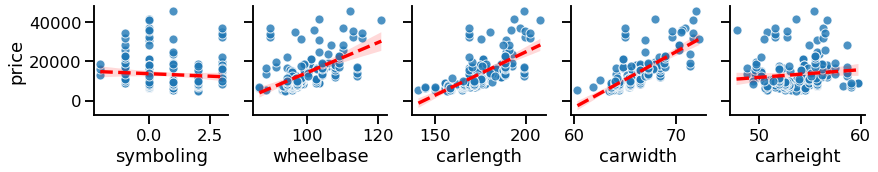

In [366]:
## Making a pairplot with regression lines (First five features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

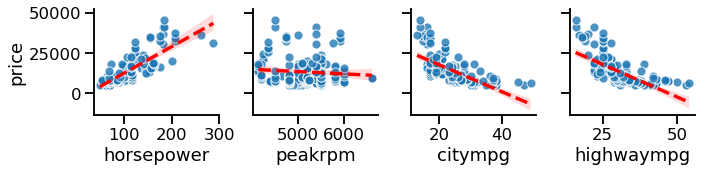

In [367]:
## Making a pairplot with regression lines (final 4 features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[10:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

The following features do not appear to have a linear relationship with the target:
- symboling
- carheight
- compressionratio
- peakrpm
- stroke\
These are the columns I will drop:

In [368]:
## dropping nonlinear features
df = df.drop(columns=['symboling','carheight', 'compressionratio', 'peakrpm', 'stroke'])

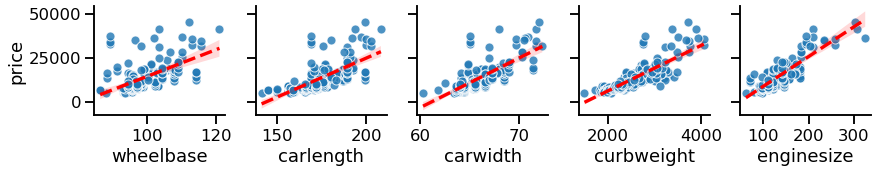

In [369]:
## saving list of numeric features to slice for pairplot
num_selector = make_column_selector(dtype_include='number')
cols = num_selector(df.drop(columns='price'))
len(cols)

## Rechecking linearity of remaining features (First five features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[:5],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

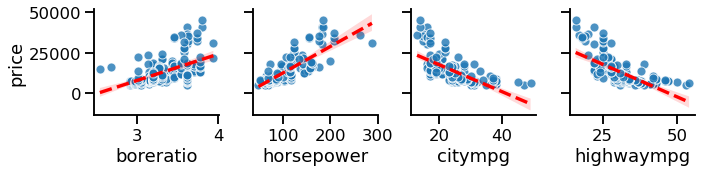

In [370]:

## Rechecking linearity of remaining features (Remaining four features)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=cols[5:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

## Checking for the Assumption of Little-to-No Multicollinearity

In [371]:
sns.set_context('talk')

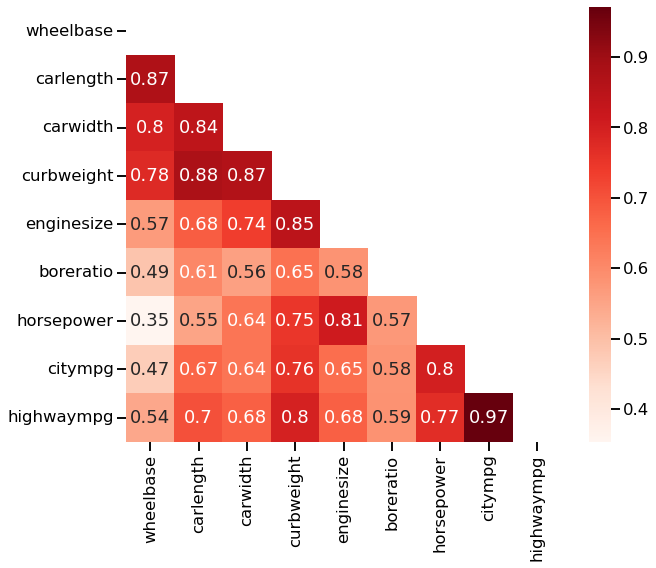

In [372]:
plt.subplots(figsize = (10,8))
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

There is a lot of multicollinearity here! There are a lot of options for features to drop. I will explore which feature may be the best to drop:

In [373]:
def corr_adj_list(df, threshold = 0.8):
    """
    Returns an adjacency list representing a graph where each feature x is connected to other features
    that x is highly correlated to  
    """
    corr = df.corr().abs()
    # code adapted from https://www.geeksforgeeks.org/how-to-get-column-and-row-names-in-dataframe/
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = corr >= threshold
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
        # Return a list of tuples indicating the positions of value in the dataframe
    listOfPos = [(x,y) for x, y in listOfPos if x != y] #removing the correlations w/ self
    correlations = {}

    for x, y in listOfPos:
        if x in correlations.keys():
            correlations[x].append(y)
        else:
            correlations[x] = [y]
        if y in correlations.keys():
            correlations[y].append(x)
        else:
            correlations[y] = [x]

    for feature, corrs in correlations.items():
        correlations[feature] = list(set(corrs))
    return correlations

In [374]:
edges = corr_adj_list(df.drop(columns =['price']))
edges

{'carlength': ['curbweight', 'carwidth', 'wheelbase'],
 'wheelbase': ['carlength'],
 'carwidth': ['carlength', 'curbweight'],
 'curbweight': ['carlength', 'carwidth', 'enginesize'],
 'enginesize': ['curbweight', 'horsepower'],
 'horsepower': ['citympg', 'enginesize'],
 'citympg': ['horsepower', 'highwaympg'],
 'highwaympg': ['citympg']}

In [375]:
!pip install networkx

In [376]:
import networkx as nx

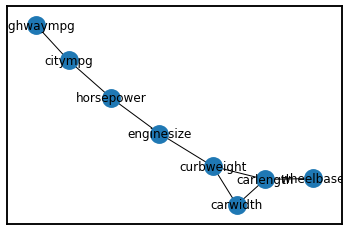

In [377]:
G = nx.from_dict_of_lists(edges)
nx.draw_networkx(G)
plt.show()

So, visually, we can we must drop at least 4 features to ensure independence of features.

In [381]:
candidates = list(edges.keys())
candidates

['carlength',
 'wheelbase',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg']

In [382]:
df.corr().abs()['price'][candidates].sort_values()

wheelbase     0.577816
carlength     0.682920
citympg       0.685751
highwaympg    0.697599
carwidth      0.759325
horsepower    0.808139
curbweight    0.835305
enginesize    0.874145
Name: price, dtype: float64

Picking which features to drop based on which ones are least correlated with the target. Also, I will reproduce the linearity plots from above, as a graph that looks less linear will also be a cood candidate to drop.

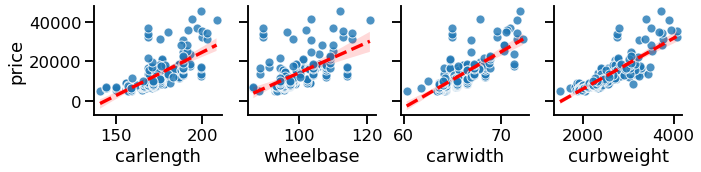

In [383]:
## Re-examining linearity of collinear features (first 4)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=candidates[:4],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

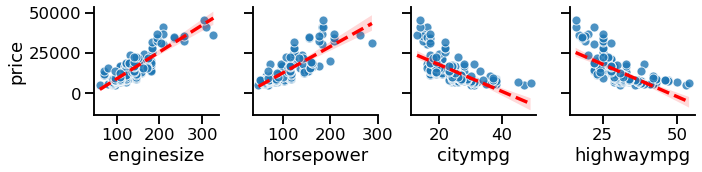

In [384]:
## Re-examining linearity of collinear features (last 4)
sns.pairplot(df, y_vars='price',kind='reg',x_vars=candidates[4:],
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

My first thought is to drop carlength because it has the lowest correlation with the target of features that are colinear with more than one feature. In the next decision of feature to drop, citympg or highwaympg will be good to consider because they are the least linear of the features.

**Dropping carlength feature**

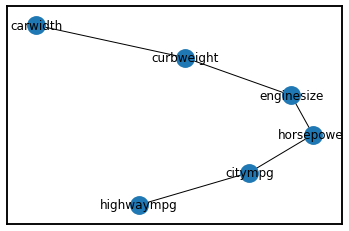

In [386]:
edges = corr_adj_list(df.drop(columns =['price', 'carlength']))
G = nx.from_dict_of_lists(edges)
nx.draw_networkx(G)
plt.show()

citympg might be a good next choice because it has the lowest target correlation of our remaining colinear features, and is not very linear with the target.

**Dropping citympg feature**

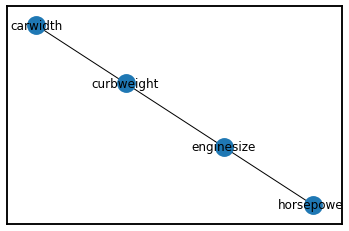

In [387]:
edges = corr_adj_list(df.drop(columns =['price', 'carlength', 'citympg']))
G = nx.from_dict_of_lists(edges)
nx.draw_networkx(G)
plt.show()

In [388]:
candidates = list(edges.keys())
df.corr().abs()['price'][candidates].sort_values()

carwidth      0.759325
horsepower    0.808139
curbweight    0.835305
enginesize    0.874145
Name: price, dtype: float64

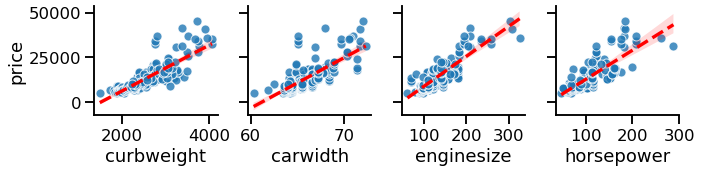

In [389]:
## Re-examining linearity of the remaining colinear features
sns.pairplot(df, y_vars='price',kind='reg',x_vars=candidates,
             plot_kws=dict(line_kws={'color':'red', 'ls':'--'},
                           scatter_kws={'edgecolor':'white','lw':1}));

This is a more difficult choice, but I will drop horsepower and curbweight to avoid dropping the most highly correlated feature, enginesize. This might be a decision to re-evaluate when iterating the model.

In [390]:
#saving multicollinear df 
mc_df = df.copy()
df = mc_df
#df = df.drop(columns = ['carlength', 'citympg', 'horsepower', 'curbweight'])

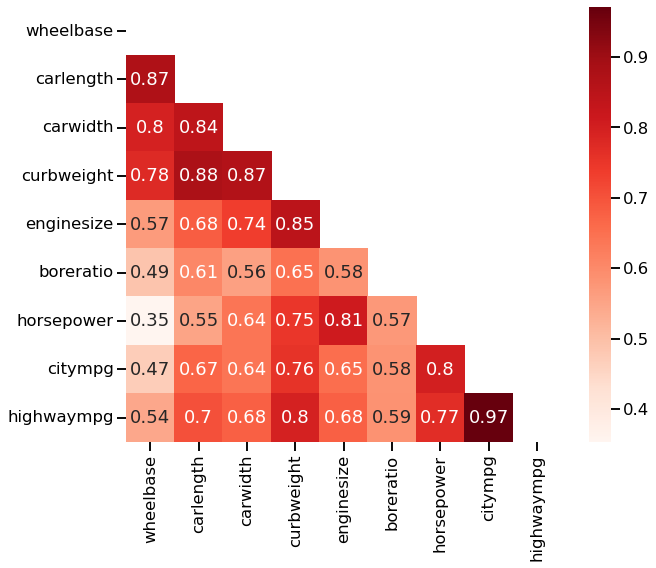

In [391]:
# confirming final correlations
plt.subplots(figsize = (10,8))
corr = df.drop(columns='price').corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

In [392]:
corr['carwidth']['wheelbase']

0.795143643616968

Ok, the carwidth-wheelbase correlation is just *under* our threshold, so I will proceed.

# Running the new model

## Preprocessing

In [393]:
## Make x and y variables
y = df['price'].copy()
X = df.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,
91,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,2017,ohc,four,103,idi,2.99,55,45,50
174,toyota corolla,gas,std,four,sedan,fwd,front,102.4,175.6,66.5,2326,ohc,four,122,mpfi,3.31,92,29,34
94,nissan titan,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,2024,ohc,four,97,2bbl,3.15,69,31,37
6,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,2507,ohc,five,136,mpfi,3.19,110,19,25
168,toyota corona liftback,gas,std,two,hardtop,rwd,front,98.4,176.2,65.6,2540,ohc,four,146,mpfi,3.62,116,24,30


In [394]:
from sklearn import set_config
set_config(display="diagram")

In [395]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['wheelbase', 'carlength', 'carwidth',
                                  'curbweight', 'enginesize', 'boreratio',
                                  'horsepower', 'citympg', 'highwaympg']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['CarName', 'fueltype', 'aspiration',
                                  'doornumber', 'carbody', 'drivewheel',
                                  'enginelocation', 'enginetype',
                                  'cylindernumber', 'fuelsystem'])])

In [396]:
## fit the col transformer to learn feature names 
preprocessor.fit(X_train)
## Now create list of our final features after preprocessing
final_features = []
## adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)
## Now, get OHe feature names
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
final_features.extend(cat_features)
## Transform X vars and remake as dataframes
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)
X_test_df = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_test_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CarName_Nissan versa,...,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
16,103.5,189.0,66.9,3230.0,209.0,3.62,182.0,16.0,22.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,99.5,178.2,67.9,3053.0,131.0,3.13,160.0,16.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
101,97.2,173.4,65.2,2302.0,120.0,3.33,97.0,27.0,34.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
133,99.1,186.6,66.5,2658.0,121.0,3.54,110.0,21.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
69,110.0,190.9,70.3,3750.0,183.0,3.58,123.0,22.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


 **Note: It may be a good idea, as a future exercise, to recast cylindernumber and doornumber as numeric features. I don't know enough about cars to make a confident decision about this. Will proceed with these as categorical but may be a decision to revisit**

In [397]:
## Adding constants for statsmodels
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False, has_constant='add')
X_train_df.head(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CarName_Nissan versa,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,const
car_ID,,,,,,,,,,,,,,,,,,,,,
91,94.5,165.3,63.8,2017.0,103.0,2.99,55.0,45.0,50.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
174,102.4,175.6,66.5,2326.0,122.0,3.31,92.0,29.0,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [398]:
X_test_df.head(2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CarName_Nissan versa,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,const
car_ID,,,,,,,,,,,,,,,,,,,,,
16,103.5,189.0,66.9,3230.0,209.0,3.62,182.0,16.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,99.5,178.2,67.9,3053.0,131.0,3.13,160.0,16.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Fitting the Model

In [399]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     19.27
Date:                Sun, 15 May 2022   Prob (F-statistic):           3.22e-06
Time:                        10:43:48   Log-Likelihood:                -1168.0
No. Observations:                 153   AIC:                             2620.
Df Residuals:                      11   BIC:                             3050.
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

## Checking the Residuals

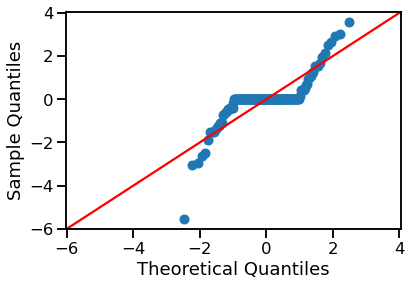

In [400]:
resid = result.resid
sm.graphics.qqplot(resid,line='45',fit=True);

The left tail has at least one very large residual!

## Checking Homoscedasticity

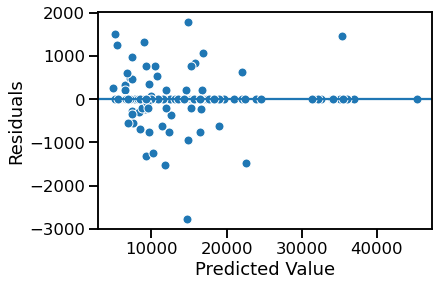

In [401]:
# Get predictions and calculate residuals
y_pred = result.predict(X_train_df)
resid = y_train -  y_pred
## Plot predicitons vs resids
fig, ax = plt.subplots()
ax.scatter(y_pred,resid,ec='white',lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals',xlabel='Predicted Value');

This looks okay, but may be a little cone-shaped on the right.

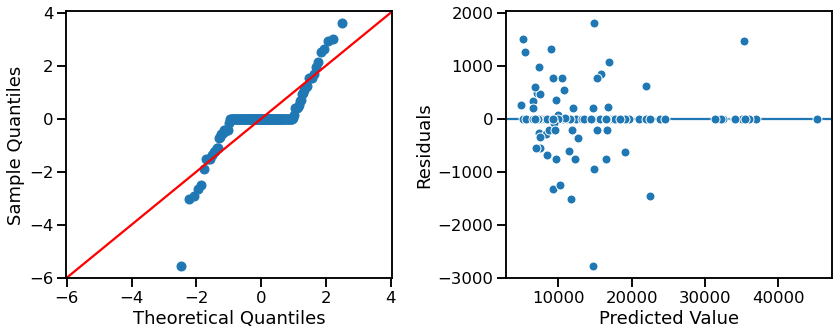

In [402]:
def evaluate_ols(result,X_train_df, y_train):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    
evaluate_ols(result,X_train_df, y_train)


# Model #3

## Removing outliers

In [403]:
scaler = StandardScaler()
z_price = scaler.fit_transform(y_train.values.reshape(-1,1))
z_price = pd.Series(z_price.flatten(),index=y_train.index )
z_price

car_ID
91    -0.795646
174   -0.560951
94    -0.763913
6      0.238966
168   -0.624290
         ...   
107    0.638670
15     1.421325
93    -0.827379
180    0.333910
103    0.130948
Length: 153, dtype: float64

In [404]:
## saving the true/false result as our outlier index
idx_outliers= z_price>3
idx_outliers

car_ID
91     False
174    False
94     False
6      False
168    False
       ...  
107    False
15     False
93     False
180    False
103    False
Length: 153, dtype: bool

In [405]:
## How many outliers did we find?
idx_outliers.sum()

2

In [406]:
## saving a cleaned version of y_train and X_train with outliers removed
y_train_cln = y_train[~idx_outliers]
X_train_cln = X_train_df[~idx_outliers]

In [407]:
print(f"Our model includes cars priced:")
print(f"- Greater than ${y_train_cln.min():,.2f}")
print(f"- Less than ${y_train_cln.max():,.2f}")

Our model includes cars priced:
- Greater than $5,118.00
- Less than $36,880.00


In [408]:
# Getting scaled y_test
z_price_test = scaler.transform(y_test.values.reshape(-1,1))
z_price_test = pd.Series(z_price_test.flatten(),index=y_test.index )
# saving the true/false result as our outlier index
idx_outliers_test= z_price_test>3
# how many outleirs in test data?
idx_outliers_test.sum()

2

In [409]:
## make clean version of X_test and y_test
X_test_cln = X_test_df[~idx_outliers_test] 
y_test_cln = y_test[~idx_outliers_test]

## Fit and Diagnose a New Model with Outliers Removed

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     16.23
Date:                Sun, 15 May 2022   Prob (F-statistic):           7.91e-06
Time:                        10:43:50   Log-Likelihood:                -1153.7
No. Observations:                 151   AIC:                             2587.
Df Residuals:                      11   BIC:                             3010.
Df Model:                         139                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

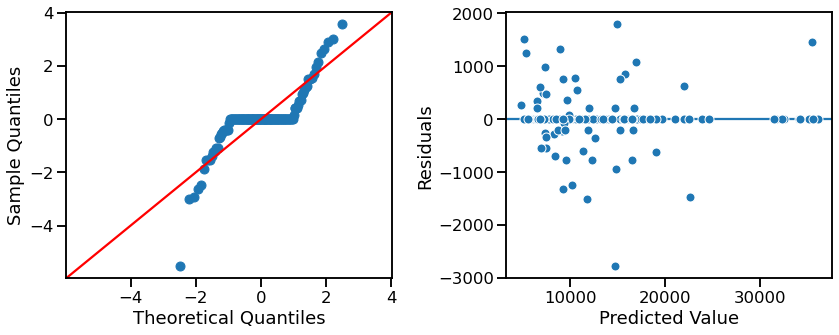

In [410]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train_cln,X_train_cln)
result = model.fit()
print(result.summary())
evaluate_ols(result,X_train_cln,y_train_cln)

There isn't much improvement by removing the outliers.

## Remove Columns with Insignificant P-Values

In [411]:
## save p-values
p_vals = result.pvalues
## filter for p_values that are >.05
p_vals[p_vals>.05]

wheelbase          0.695407
carlength          0.759837
carwidth           0.077509
enginesize         0.698686
boreratio          0.214501
                     ...   
fuelsystem_idi     0.150337
fuelsystem_mpfi    0.679692
fuelsystem_spdi    0.609564
fuelsystem_spfi    0.072565
const              0.159374
Length: 157, dtype: float64

In [412]:
cat_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [413]:
for col_name in cat_cols:
    df_cols = [col for col in X_train_df.columns if col.startswith(col_name)]
    insig_cols = [col for col in p_vals[p_vals>.05].index if col.startswith(col_name)]
    drop = True if len(insig_cols)/len(df_cols) > .50 else False
    print(f"{len(insig_cols)} of {len(df_cols)} are insignificant in {col_name} -- Drop? {drop}")

115 of 119 are insignificant in CarName -- Drop? True
2 of 2 are insignificant in fueltype -- Drop? True
2 of 2 are insignificant in aspiration -- Drop? True
2 of 2 are insignificant in doornumber -- Drop? True
5 of 5 are insignificant in carbody -- Drop? True
3 of 3 are insignificant in drivewheel -- Drop? True
0 of 2 are insignificant in enginelocation -- Drop? False
7 of 7 are insignificant in enginetype -- Drop? True
5 of 6 are insignificant in cylindernumber -- Drop? True
7 of 7 are insignificant in fuelsystem -- Drop? True


All of the categorical columns should be dropped!

In [414]:
df = df.drop(columns = cat_cols)
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
2,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
3,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
4,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
5,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


In [420]:
cols_to_drop = list(p_vals[p_vals>.05].head(8).index)

In [423]:
df_new = df.drop(columns = cols_to_drop)

Wow! Only one feature left! Obviously mistakes were made. But out of curiosity, I will see how this new model performs.

In [424]:
## Make x and y variables
y = df_new['price'].copy()
X = df_new.drop(columns=['price']).copy()
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.head()

,curbweight
car_ID,
91,2017
174,2326
94,2024
6,2507
168,2540


In [429]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
## make pipelines
# #cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
#                                        fill_value='MISSING'),
#                          OneHotEncoder(handle_unknown='ignore', sparse=False)
#                         )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
preprocessor = make_column_transformer( (num_pipe, num_cols),
                                       #(cat_pipe,cat_cols),
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['curbweight'])])

In [430]:
## fit the col transformer to learn feature names 
preprocessor.fit(X_train)
## Now create list of our final features after preprocessing
final_features = []
## adding the numeric features which process first in the Col Trans
final_features.extend(num_cols)
## Now, get OHe feature names
#cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)
#final_features.extend(cat_features)
## Transform X vars and remake as dataframes
X_train_df = pd.DataFrame( preprocessor.transform(X_train), 
                         columns=final_features, 
                         index=X_train.index)
X_test_df = pd.DataFrame( preprocessor.transform(X_test), 
                         columns=final_features, 
                         index=X_test.index)
X_test_df.head()

,curbweight
car_ID,
16,3230.0
10,3053.0
101,2302.0
133,2658.0
69,3750.0


In [431]:
## Adding constants for statsmodels
X_train_df = sm.add_constant(X_train_df, prepend=False)
X_test_df = sm.add_constant(X_test_df, prepend=False, has_constant='add')
X_train_df.head(2)

,curbweight,const
car_ID,,
91,2017.0,1.0
174,2326.0,1.0


In [433]:
X_test_df.head(2)

,curbweight,const
car_ID,,
16,3230.0,1.0
10,3053.0,1.0


In [434]:
## make & fit a statmsodels OLS
model = sm.OLS(y_train,X_train_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     319.0
Date:                Sun, 15 May 2022   Prob (F-statistic):           4.64e-39
Time:                        10:59:25   Log-Likelihood:                -1502.9
No. Observations:                 153   AIC:                             3010.
Df Residuals:                     151   BIC:                             3016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
curbweight    12.6611      0.709     17.860      0.0

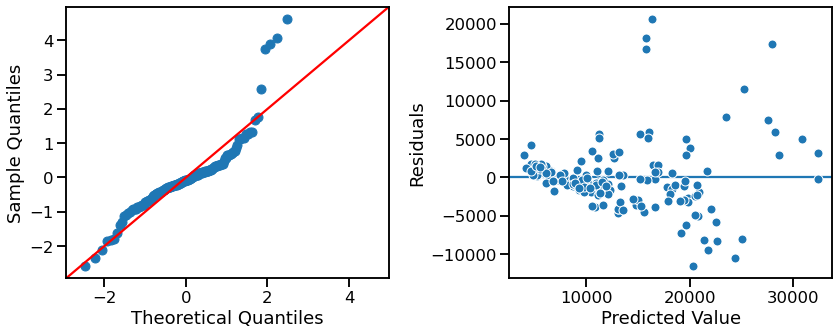

In [435]:
evaluate_ols(result,X_train_df, y_train)

Well, the model was able to account for 68% of the variance with only one feature (curbweight). And the Q-Q plot no longer has the large residual to the left. In comparison, the residuals on the right appear to be more significant, but perhaps this is an acceptable deviation.

The residual plot looks a lot better though! No more cone shape!

Quite unsatisfying to end up with a model with only one feature! It would be a good exercise to re-do this exercise, dropping different features (maybe citympg & highwaympg in addition to others when checking linearity assumption, and other combinations when checking independence of features).